In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [2]:
data = pd.read_csv("emails.csv")
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
data = data.drop('Email No.', axis=1)

In [4]:
data.shape

(5172, 3001)

In [5]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [31]:
data['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [32]:
X = data.drop('Prediction', axis = 1)
y = data['Prediction']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2) #meaning it will consider the 2 nearest neighbors when making predictions.
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [47]:
y_pred = neigh.predict(X_test)

In [48]:
neigh.score(X_train, y_train)
neigh.score(X_test, y_test)
# If the test score is slightly lower, it could be a sign of overfitting - when the machine learning model gives accurate
# predictions for training data but not for new data

0.8685990338164251

In [49]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[667,  49],
       [ 87, 232]], dtype=int64)

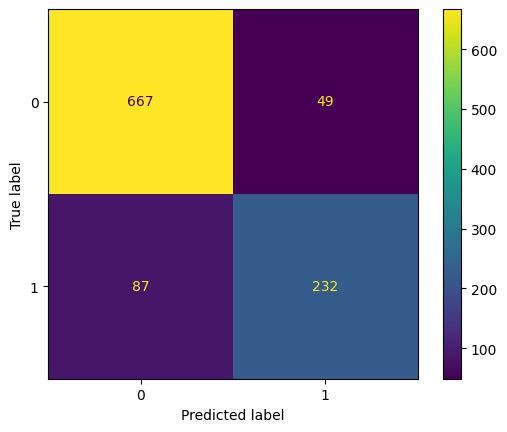

In [50]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       716
           1       0.83      0.73      0.77       319

    accuracy                           0.87      1035
   macro avg       0.86      0.83      0.84      1035
weighted avg       0.87      0.87      0.87      1035



In [53]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.8685990338164251

In [54]:
print("precision_score: ")
precision_score(y_test, y_pred)

precision_score: 


0.8256227758007118

In [55]:
print("recall_score: ")
recall_score(y_test, y_pred)

recall_score: 


0.7272727272727273

In [56]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.13140096618357489

In [61]:
from sklearn.svm import SVC
SVM = SVC(gamma = 'auto')
SVM.fit(X_train, y_train)

SVC(gamma='auto')

In [21]:
y_pred = SVM.predict(X_test)


In [58]:
SVM.score(X_train, y_train)
SVM.score(X_test, y_test)

0.9033816425120773

In [59]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[667,  49],
       [ 87, 232]], dtype=int64)

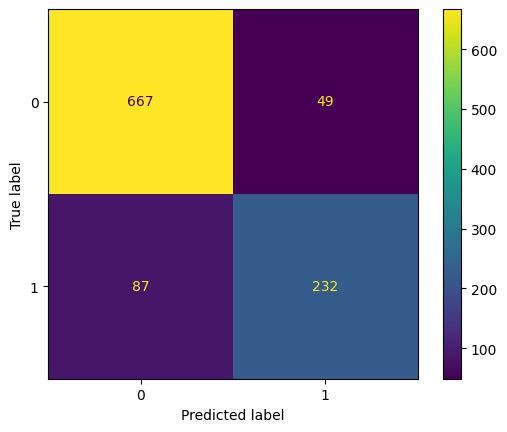

In [60]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       735
           1       0.90      0.79      0.84       300

    accuracy                           0.91      1035
   macro avg       0.91      0.88      0.89      1035
weighted avg       0.91      0.91      0.91      1035



In [ ]:
# KNN (K-Nearest Neighbors) is a simple, instance-based machine learning algorithm used for classification and regression. 
# It works by finding the k closest data points to a given input and making predictions based on the majority label (for classification) 
# or the average value (for regression) of those neighbors. The "closeness" is typically measured using a distance metric like Euclidean distance.


In [63]:
# True Positives (TP) = 559: These are the instances where the model correctly predicted the positive class (class 1).
# False Negatives (FN) = 195: These are the instances where the model incorrectly predicted the negative class (class 0) 
# when the actual class was positive (class 1).
# False Positives (FP) = 215: These are the instances where the model incorrectly predicted the positive class (class 
# the actual class was negative (class 0).
# True Negatives (TN) = 66: These are the instances where the model correctly predicted the negative class (class 0).

# accuracy = (tp + tn)/all
# presion = tp/tp+fp recision is the proportion of positive predictions that are actually correct.
# recall = tp/tp+ Recall is the proportion of actual positives that were correctly identified by the model.
# f1 score = 2* presion * recall / presion + recall mean of precision and recall




In [ ]:
# A Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression tasks. 
# While it can be applied to regression problems, SVM is best suited for classification tasks. The primary objective of the SVM algorithm is
# to identify the optimal hyperplane in an N-dimensional space that can effectively separate data points into different classes in the feature space. 
# The algorithm ensures that the margin between the closest points of different classes, known as support vectors, is maximized.

# SVM is often better for complex, high-dimensional data  (e.g., text classification, image recognition).
# KNN is often better for simple problems with small datasets and when the decision boundary is very simple or when you don't have a lot of data